/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 311.4849 - mae: 15.2206 - val_loss: 276.6614 - val_mae: 14.0493
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 274.8239 - mae: 14.2901 - val_loss: 222.3939 - val_mae: 12.4477
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 197.0714 - mae: 11.6513 - val_loss: 128.7891 - val_mae: 9.6978
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 98.9990 - mae: 8.5789 - val_loss: 30.5379 - val_mae: 4.9324
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 19.4051 - mae: 3.7404 - val_loss: 7.8074 - val_mae: 2.2175
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 7.8879 - mae: 2.2018 - val_loss: 6.5132 - val_mae: 2.0303
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.0968 - mae: 2.1049 - val_loss: 5.6720 - val_mae: 1.9126
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.0879 - mae: 1.9770 - val_loss: 5.1361 - val_mae: 1.8381
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/s

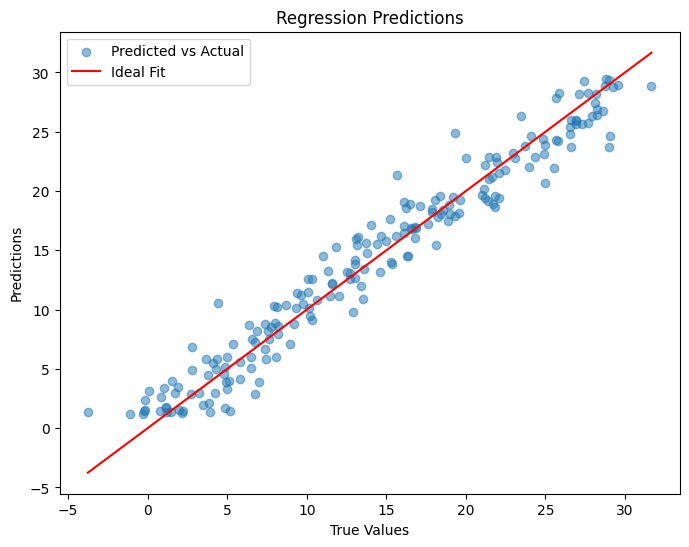

Regression Model Architecture:


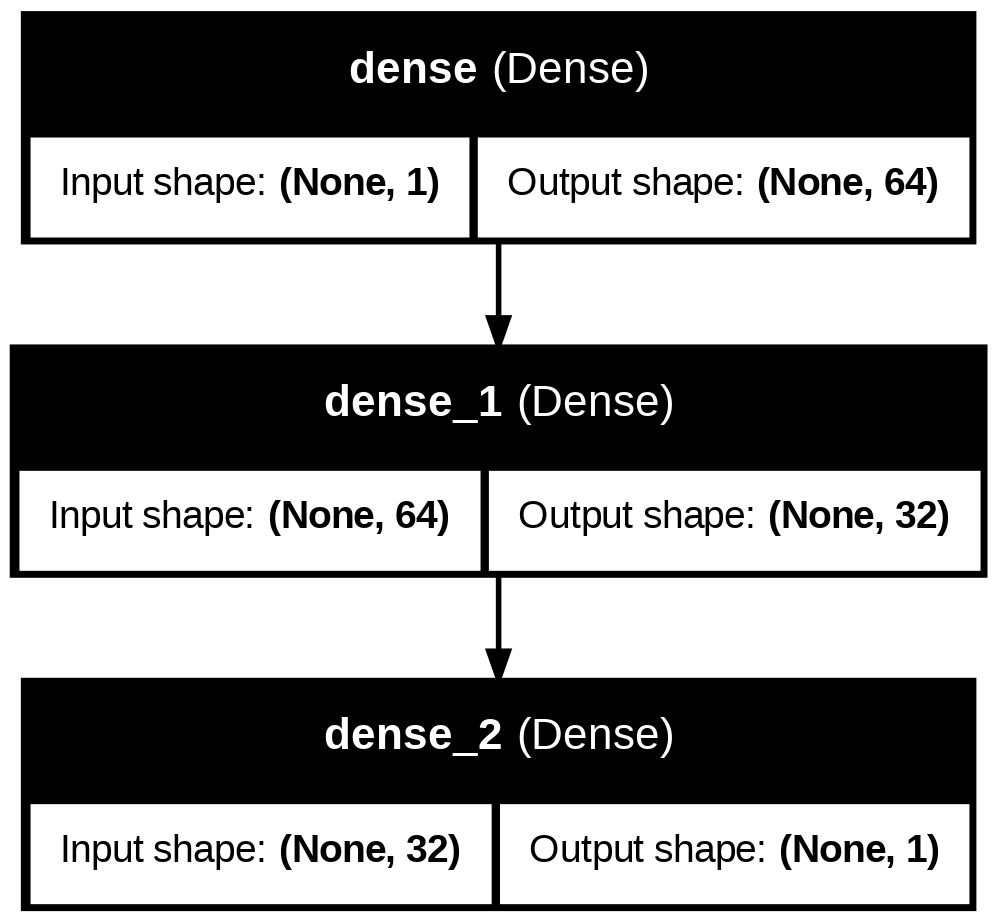


Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,725 (26.27 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,484 (17.52 KB)

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import datetime
from tensorflow.keras.callbacks import TensorBoard

# Initialize TensorBoard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Generate synthetic regression data
np.random.seed(42)
X = np.random.rand(1000, 1) * 10  # Feature: Random values between 0 and 10
y = 3 * X.squeeze() + np.random.randn(1000) * 2  # Linear relation with noise

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define regression model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Single output for regression
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, callbacks=[tensorboard_callback])

# Evaluate model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae:.4f}")

# Predictions
y_pred = model.predict(X_test)

# Compute regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

# Plot predictions vs true values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', label='Ideal Fit')
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Regression Predictions")
plt.legend()
plt.show()

# Log model architecture
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='regression_model.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image, display
print("Regression Model Architecture:")
display(Image('regression_model.png'))

# Print model summary
print("\nModel Summary:")
model.summary()
